In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.shape

(13320, 9)

In [8]:
df.drop(columns = ['area_type', 'availability', 'society'], inplace = True)
# dropping the location might not be good idea here

In [9]:
df.columns = ['location', 'bhk', 'area', 'bathroom', 'balcony', 'price']

In [10]:
df

,location,bhk,area,bathroom,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [11]:
df.isnull().sum()

location      1
bhk          16
area          0
bathroom     73
balcony     609
price         0
dtype: int64

In [12]:
# handling missing values for balcony

print(df.balcony.unique())

print(df.balcony.mode())

[ 1.  3. nan  2.  0.]
0    2.0
Name: balcony, dtype: float64


In [13]:
import random

# filling randomly with mode values
df.balcony = df.balcony.fillna(random.choice([0, 2]))

In [14]:
df.isnull().sum()

location     1
bhk         16
area         0
bathroom    73
balcony      0
price        0
dtype: int64

In [15]:
df.shape

(13320, 6)

In [16]:
# dropping the na values row

df.dropna(inplace = True)

In [17]:
df.isnull().sum()

location    0
bhk         0
area        0
bathroom    0
balcony     0
price       0
dtype: int64

In [18]:
df.shape

(13246, 6)

In [19]:
df.head()

,location,bhk,area,bathroom,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [20]:
# bhk is catagorical col -> conversion to numeric is req
df.bhk.unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df.bhk = df.bhk.apply(lambda x: int(x.strip().split()[0]))

In [22]:
df.head()

,location,bhk,area,bathroom,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [23]:
df.dtypes

location     object
bhk           int64
area         object
bathroom    float64
balcony     float64
price       float64
dtype: object

In [24]:
df.area.unique() # in some cases the range is given for area

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
# get all the row which don't have single value (hence they can't be converted to float)

In [26]:
def convertable_to_float(x):
    try:
        float(x)
    except:
        return False
    return True

def not_conv_to_float(x):
    return not convertable_to_float(x)

In [27]:
df[df['area'].apply(not_conv_to_float)]

,location,bhk,area,bathroom,balcony,price
30,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
122,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
188,KR Puram,2,1015 - 1540,2.0,0.0,56.800
...,...,...,...,...,...,...
12975,Whitefield,2,850 - 1060,2.0,0.0,38.190
12990,Talaghattapura,3,1804 - 2273,3.0,0.0,122.000
13059,Harlur,2,1200 - 1470,2.0,0.0,72.760
13265,Hoodi,2,1133 - 1384,2.0,0.0,59.135


In [28]:
# since only 190 such rows are there -> drop them

In [29]:
# keeping only the row for which the area can be converted into float
df = df[df['area'].apply(convertable_to_float)]
df

,location,bhk,area,bathroom,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,0.0,231.00
13316,Richards Town,4,3600,5.0,0.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [30]:
df.area = df.area.astype(float) # converting to float

/tmp/ipykernel_3966/3251985793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.area = df.area.astype(float) # converting to float


In [31]:
# making a new col for price per sqft area -> which is very useful in real estate
df['price_per_sqft'] = df['price'] *100000 / df['area']

/tmp/ipykernel_3966/1621536729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price'] *100000 / df['area']


In [32]:
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,0.0,231.00,6689.834926
13316,Richards Town,4,3600.0,5.0,0.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,10407.336319


In [33]:
# handling the location

In [34]:
df.location = df.location.apply(lambda x: x.strip())

/tmp/ipykernel_3966/3339727401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.location = df.location.apply(lambda x: x.strip())


In [35]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [36]:
len(df.location.unique())

1287

In [37]:
df.groupby('location')

In [38]:
df.groupby('location')['location']

In [39]:
df.groupby('location')['location'].agg('count') # count of each location in df

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [40]:
loc_stats = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stats

location
Whitefield               518
Sarjapur  Road           386
Electronic City          304
Kanakpura Road           260
Thanisandra              225
                        ... 
Kanakapura Main Road       1
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [41]:
loc_stats[loc_stats <= 10]

location
Thyagaraja Nagar         10
Dodsworth Layout         10
Ganga Nagar              10
ITPL                     10
Sector 1 HSR Layout      10
                         ..
Kanakapura Main Road      1
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
whitefiled                1
Name: location, Length: 1048, dtype: int64

In [42]:
# from total 1287, 1048 location count is less than or equal to 10
# these location names can be generalized in one catagory such as other

In [43]:
loc_stats_less_than_10 = loc_stats[loc_stats <= 10]
loc_stats_less_than_10

location
Thyagaraja Nagar         10
Dodsworth Layout         10
Ganga Nagar              10
ITPL                     10
Sector 1 HSR Layout      10
                         ..
Kanakapura Main Road      1
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
whitefiled                1
Name: location, Length: 1048, dtype: int64

In [44]:
len(df.location.unique())

1287

In [45]:
df.location = df.location.apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)

/tmp/ipykernel_3966/1847110598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.location = df.location.apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)


In [46]:
len(df.location.unique())

240

In [47]:
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,0.0,231.00,6689.834926
13316,other,4,3600.0,5.0,0.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,10407.336319


In [48]:
### Outliers removal

# say we have the criteria that each bedroom must have the area more than 300 sqft

df[df['area']/df['bhk'] < 300] # row where the area per bedroom is < 300

# we need to remove these, as these are outliers as per our requirement

,location,bhk,area,bathroom,balcony,price,price_per_sqft
9,other,6,1020.0,6.0,0.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,0.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,1.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,0.0,85.0,6296.296296
70,other,3,500.0,3.0,2.0,100.0,20000.000000
...,...,...,...,...,...,...,...
13277,other,7,1400.0,7.0,0.0,218.0,15571.428571
13279,other,6,1200.0,5.0,0.0,130.0,10833.333333
13281,Margondanahalli,5,1375.0,5.0,1.0,125.0,9090.909091
13303,Vidyaranyapura,5,774.0,5.0,3.0,70.0,9043.927649


In [49]:
df['area_per_bedroom'] = df['area'] / df['bhk']

/tmp/ipykernel_3966/1275098005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_per_bedroom'] = df['area'] / df['bhk']


In [50]:
def area_less_than_300(x):
    if x < 300:
        return True
    else:
        return False


In [51]:
# row with area_per_bedroom < 300
df[df['area_per_bedroom'].apply(area_less_than_300)]

,location,bhk,area,bathroom,balcony,price,price_per_sqft,area_per_bedroom
9,other,6,1020.0,6.0,0.0,370.0,36274.509804,170.000000
45,HSR Layout,8,600.0,9.0,0.0,200.0,33333.333333,75.000000
58,Murugeshpalya,6,1407.0,4.0,1.0,150.0,10660.980810,234.500000
68,Devarachikkanahalli,8,1350.0,7.0,0.0,85.0,6296.296296,168.750000
70,other,3,500.0,3.0,2.0,100.0,20000.000000,166.666667
...,...,...,...,...,...,...,...,...
13277,other,7,1400.0,7.0,0.0,218.0,15571.428571,200.000000
13279,other,6,1200.0,5.0,0.0,130.0,10833.333333,200.000000
13281,Margondanahalli,5,1375.0,5.0,1.0,125.0,9090.909091,275.000000
13303,Vidyaranyapura,5,774.0,5.0,3.0,70.0,9043.927649,154.800000


In [52]:
# keeping row with area more than 300
'''Use the  '~' before df'''

df[~df['area_per_bedroom'].apply(area_less_than_300)]  

,location,bhk,area,bathroom,balcony,price,price_per_sqft,area_per_bedroom
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606,528.00
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615,650.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556,480.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861,507.00
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000,600.00
...,...,...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,0.0,231.00,6689.834926,690.60
13316,other,4,3600.0,5.0,0.0,400.00,11111.111111,900.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,5258.545136,570.50
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,10407.336319,1172.25


In [53]:
df = df[~df['area_per_bedroom'].apply(area_less_than_300)]  
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft,area_per_bedroom
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606,528.00
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615,650.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556,480.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861,507.00
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000,600.00
...,...,...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,0.0,231.00,6689.834926,690.60
13316,other,4,3600.0,5.0,0.0,400.00,11111.111111,900.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,5258.545136,570.50
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,10407.336319,1172.25


In [54]:
# now we don't need the area_per_bedroom 
df.drop(columns = ['area_per_bedroom'], inplace = True)

/tmp/ipykernel_3966/289483351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['area_per_bedroom'], inplace = True)


In [55]:
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,0.0,231.00,6689.834926
13316,other,4,3600.0,5.0,0.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,10407.336319


In [56]:
df.price_per_sqft.describe()

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64

In [57]:
# the max and min have a huge diff -> lot more dispersion

In [58]:
# we have to take care of the outliers as per location as location can have big impact in max and min val

In [59]:
df.groupby('location')

In [60]:
for key, subdf in df.groupby('location'):
    print('KEY:', key)
    print()
    print(subdf)
    break

KEY: 1st Block Jayanagar

                  location  bhk    area  bathroom  balcony  price  \
210    1st Block Jayanagar    4  2850.0       4.0      1.0  428.0   
848    1st Block Jayanagar    3  1630.0       3.0      2.0  194.0   
2152   1st Block Jayanagar    3  1875.0       2.0      3.0  235.0   
2355   1st Block Jayanagar    4  2400.0       4.0      2.0  450.0   
4991   1st Block Jayanagar    2  1000.0       3.0      2.0   60.0   
7138   1st Block Jayanagar    3  1200.0       2.0      0.0  130.0   
7358   1st Block Jayanagar    2  1235.0       2.0      2.0  148.0   
7383   1st Block Jayanagar    4  2750.0       4.0      0.0  413.0   
8507   1st Block Jayanagar    3  1760.0       3.0      0.0  115.0   
10972  1st Block Jayanagar    4  2450.0       4.0      2.0  368.0   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383     15018.181818 

In [61]:
# Std as a Measure of Spread:
    # Std is a measure of how spread out the values are around the mean of a dataset.
    # A smaller std means that the data points are closer to the mean, 
    # and a larger std indicates more variability.
# In this case, by using m - st and m + st, we are defining a range where most data points
# in a normally distributed dataset are likely to fall. Approximately 68% of the data should lie within 
# one standard deviation of the mean in a normal distribution (assuming the data is roughly Gaussian)

In [62]:
# hence we only keep the values in the range of ((mean-std) , (mean+std))

In [63]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10146, 7)

In [64]:
# We should also remove properties where for same location, the price of (for example) 
# 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area)

In [65]:
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.00,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.00,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,3.0,235.00,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,0.0,130.00,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,2.0,148.00,11983.805668
...,...,...,...,...,...,...,...
10141,other,2,1353.0,2.0,2.0,110.00,8130.081301
10142,other,1,812.0,1.0,0.0,26.00,3201.970443
10143,other,3,1440.0,2.0,2.0,63.93,4439.583333
10144,other,2,1075.0,2.0,2.0,48.00,4465.116279


In [66]:
for location, location_df in df.groupby('location'):
    print('KEY:', location)
    print()
    print(location_df)
    break

KEY: 1st Block Jayanagar

              location  bhk    area  bathroom  balcony  price  price_per_sqft
0  1st Block Jayanagar    4  2850.0       4.0      1.0  428.0    15017.543860
1  1st Block Jayanagar    3  1630.0       3.0      2.0  194.0    11901.840491
2  1st Block Jayanagar    3  1875.0       2.0      3.0  235.0    12533.333333
3  1st Block Jayanagar    3  1200.0       2.0      0.0  130.0    10833.333333
4  1st Block Jayanagar    2  1235.0       2.0      2.0  148.0    11983.805668
5  1st Block Jayanagar    4  2750.0       4.0      0.0  413.0    15018.181818
6  1st Block Jayanagar    4  2450.0       4.0      2.0  368.0    15020.408163


In [67]:
for bhk, bhk_df in location_df.groupby('bhk'):
    print('#########   '+ str(bhk) + ' BHK    #########')
    print(bhk_df)

#########   2 BHK    #########
              location  bhk    area  bathroom  balcony  price  price_per_sqft
4  1st Block Jayanagar    2  1235.0       2.0      2.0  148.0    11983.805668
#########   3 BHK    #########
              location  bhk    area  bathroom  balcony  price  price_per_sqft
1  1st Block Jayanagar    3  1630.0       3.0      2.0  194.0    11901.840491
2  1st Block Jayanagar    3  1875.0       2.0      3.0  235.0    12533.333333
3  1st Block Jayanagar    3  1200.0       2.0      0.0  130.0    10833.333333
#########   4 BHK    #########
              location  bhk    area  bathroom  balcony  price  price_per_sqft
0  1st Block Jayanagar    4  2850.0       4.0      1.0  428.0    15017.543860
5  1st Block Jayanagar    4  2750.0       4.0      0.0  413.0    15018.181818
6  1st Block Jayanagar    4  2450.0       4.0      2.0  368.0    15020.408163


In [68]:
f = {}
for bhk, bhk_df in location_df.groupby('bhk'):
    f[bhk] = {
        'mean': np.mean(bhk_df.price_per_sqft),
        'std': np.std(bhk_df.price_per_sqft),
        'count': bhk_df.shape[0]
    }

for bhk, stat in f.items():
    print(bhk,':', stat)

2 : {'mean': 11983.805668016194, 'std': 0.0, 'count': 1}
3 : {'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}
4 : {'mean': 15018.711280365416, 'std': 1.2278182423353805, 'count': 3}


In [69]:
# for each bhk, this will the stats for (bhk-1) bhk from bhk_stats for the same location (1st Block Jayanagar)
for bhk, bhk_df in location_df.groupby('bhk'):
    print(bhk)
    stats = f.get(bhk-1)
    print(stats)

2
None
3
{'mean': 11983.805668016194, 'std': 0.0, 'count': 1}
4
{'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}


In [70]:
# for bhk, exclude the rows where the price_per_sqft is less then then mean(price_per_sqft) of (bhk-1)
condition = bhk_df.price_per_sqft<(stats['mean'])
p = bhk_df[condition].index.values
p

array([], dtype=int64)

In [71]:
import numpy as np

In [72]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
# df8 = df7.copy()
df.shape

(7206, 7)

In [73]:
np.max(df.area)

30000.0

In [74]:
# say we have another criteria that -> (no of bathroom <= no of bedrooms)

# so we have to remove all the row where the (no of bathroom > no of bedrooms)

In [75]:
# get the rows where (no of bathroom <= no of bedrooms) -> i.e (no of bedrooms/no of bathroom >= 1)

df['classifier'] = df['bhk'] / df['bathroom']

In [76]:
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft,classifier
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860,1.0
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491,1.0
2,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333,1.5
3,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,10833.333333,1.5
4,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,11983.805668,1.0
...,...,...,...,...,...,...,...,...
10137,other,2,1200.0,2.0,3.0,70.0,5833.333333,1.0
10138,other,1,1800.0,1.0,1.0,200.0,11111.111111,1.0
10141,other,2,1353.0,2.0,2.0,110.0,8130.081301,1.0
10142,other,1,812.0,1.0,0.0,26.0,3201.970443,1.0


In [77]:
df.shape

(7206, 8)

In [78]:
df = df[df['classifier'] >= 1]
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft,classifier
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860,1.0
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491,1.0
2,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333,1.5
3,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,10833.333333,1.5
4,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,11983.805668,1.0
...,...,...,...,...,...,...,...,...
10135,other,2,1155.0,2.0,1.0,64.0,5541.125541,1.0
10137,other,2,1200.0,2.0,3.0,70.0,5833.333333,1.0
10138,other,1,1800.0,1.0,1.0,200.0,11111.111111,1.0
10141,other,2,1353.0,2.0,2.0,110.0,8130.081301,1.0


In [79]:
df.shape

(6757, 8)

In [80]:
# now classifier is not needed
df.drop(columns = ['classifier'], inplace = True)

/tmp/ipykernel_3966/2923716110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['classifier'], inplace = True)


In [81]:
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,11983.805668
...,...,...,...,...,...,...,...
10135,other,2,1155.0,2.0,1.0,64.0,5541.125541
10137,other,2,1200.0,2.0,3.0,70.0,5833.333333
10138,other,1,1800.0,1.0,1.0,200.0,11111.111111
10141,other,2,1353.0,2.0,2.0,110.0,8130.081301


In [82]:
location = df.location
location

0        1st Block Jayanagar
1        1st Block Jayanagar
2        1st Block Jayanagar
3        1st Block Jayanagar
4        1st Block Jayanagar
                ...         
10135                  other
10137                  other
10138                  other
10141                  other
10142                  other
Name: location, Length: 6757, dtype: object

In [83]:
from ydata_profiling import ProfileReport

In [84]:
profile = ProfileReport(df)

In [85]:
# saving the report
import pickle

profile.to_file('Dataset Report.html')

/home/vikas/anaconda3/lib/python3.11/site-packages/ydata_profiling/profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/home/vikas/anaconda3/lib/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,11983.805668
...,...,...,...,...,...,...,...
10135,other,2,1155.0,2.0,1.0,64.0,5541.125541
10137,other,2,1200.0,2.0,3.0,70.0,5833.333333
10138,other,1,1800.0,1.0,1.0,200.0,11111.111111
10141,other,2,1353.0,2.0,2.0,110.0,8130.081301


In [87]:
# now we need to decide what we can do with location col
# we can use pd.get_dummies()

dummies = pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
dummies = dummies.astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# we can drop one col to avoid multicolinearity -> hence dropping 'other'
dummies.drop(columns = ['other'], inplace = True)

In [90]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# concating dummies with our df

df = pd.concat([df, dummies], axis = 1)

In [92]:
df

,location,bhk,area,bathroom,balcony,price,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,other,2,1155.0,2.0,1.0,64.0,5541.125541,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10137,other,2,1200.0,2.0,3.0,70.0,5833.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10138,other,1,1800.0,1.0,1.0,200.0,11111.111111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10141,other,2,1353.0,2.0,2.0,110.0,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
x = df.drop(columns = ['price', 'location', 'price_per_sqft'])
y = df.price

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

In [96]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [97]:
model = lr.fit(x_train, y_train)
model 

LinearRegression()

In [98]:
model.score(x_test, y_test)

0.8345435648376666

In [99]:
predictions = model.predict(x_test)
predictions

array([ 38.78083145, 216.16799071,  68.12502033, ..., 184.86299606,
        61.40459908,  62.12275322])

In [100]:
combined = pd.concat([y_test, pd.Series(predictions, index = y_test.index)], axis = 1)
combined.columns = ['Actual', 'Prediction']

In [101]:
combined

,Actual,Prediction
3828,55.00,38.780831
228,165.00,216.167991
165,77.47,68.125020
2920,170.00,150.441827
8140,300.00,198.812447
...,...,...
1105,62.00,54.341976
8057,68.40,99.205387
5933,185.00,184.862996
8550,39.00,61.404599


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Final Model Input to Output Comparision')

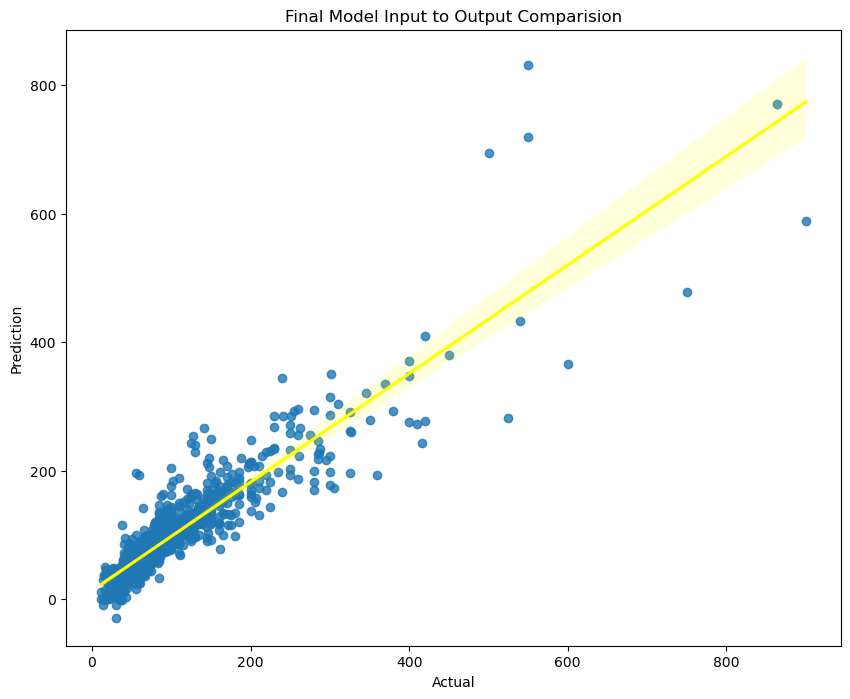

In [111]:
plt.figure(figsize = (10,8))
sns.regplot(combined, x= 'Actual', y= 'Prediction', line_kws={'color': 'yellow'})
plt.title('Final Model Input to Output Comparision')

In [160]:
plt.savefig('Model_Evaluation_Plot.jpg')

<Figure size 640x480 with 0 Axes>

In [1806]:
model.score(x_test, y_test)

0.8346015550074632

In [1807]:
# saving the model
import pickle as pk

with open('Real_Estate_Price_Prediction_model.pkl', 'wb') as file:
    pk.dump(model, file)

In [1808]:
x

,bhk,area,bathroom,balcony,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,2,1155.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10137,2,1200.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10138,1,1800.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10141,2,1353.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1825]:
x.columns

Index(['bhk', 'area', 'bathroom', 'balcony', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [1959]:
import numpy as np

In [1960]:
len(x.columns)

243

In [1517]:
np.where(x.columns == '1st Phase JP Nagar')[0][0]

5

In [1830]:
def predict_price(bhk, area, bathroom, balcony, location):
    input_x = np.zeros(len(x.columns))
    
    input_x[0] = bhk
    input_x[1] = area
    input_x[2] = bathroom
    input_x[3] = balcony
    
    loc_idx = np.where(x.columns == location)[0][0]
    if loc_idx >= 0:
            input_x[loc_idx] = 1
        
    return model.predict([input_x])[0]

In [1838]:
predict_price(3, 1000, 2, 2, '1st Phase JP Nagar')

/home/vikas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



97.03265919005341

In [1840]:
predict_price(3, 700, 2, 2, '1st Phase JP Nagar')

/home/vikas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



73.83749887485362

In [1841]:
# will need the x.columns for predict_price fun
x.columns

Index(['bhk', 'area', 'bathroom', 'balcony', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [1846]:
import json

columns = {
    'data_col_info' : [col.lower() for col in x.columns] 
}

with open('columns_data.json', 'w') as file:
    file.write(json.dumps(columns))

In [1977]:
location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [1940]:
for i in location:
    print(i)
    break

1st Block Jayanagar


In [1986]:
# write down the locations to a file as well
lc = {
    'location' : [l.lower() for l in location.unique()]
}

with open('location_data.json', 'w') as file:
    file.write(json.dumps(lc))